## 2. Agrupamiento

- En este punto buscaremos analizar si es posible agrupar los datos en función de algún criterio. Para esta tarea usaremos el algoritmo K-Means 

In [2]:
import sklearn as sklearn
from sklearn.cluster import KMeans

In [3]:
# ESTO ES PARA TENERLO EN LA NOTEBOOK SEPARADA
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy.stats as st

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

from matplotlib import patches

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None


df_preprocesado = pd.read_csv('df_preprocesado_v2.csv')

In [4]:
dataset_array = df_preprocesado.values
print(dataset_array.dtype)
print(dataset_array)

object
[['2021-09-09' -34.6373187 -58.361124 ... 55.0 82900.0
  'VENTA TRES AMBIENTES LA BOCA PISO ALTO']
 ['2021-09-09' -34.6286465 -58.3618713 ... 70.0 99000.0
  'Departamento - 4 Ambientes - Catalinas Sur']
 ['2021-09-09' -34.6100272 -58.4019341 ... 104.0 146000.0
  'Venta departamento 4 ambientes Once']
 ...
 ['2021-01-05' -34.614175 -58.4790625 ... 30.0 75500.0
  'VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA //// APTO CREDITO HIPOTECARIO']
 ['2021-01-05' -34.614175 -58.4790625 ... 31.0 74500.0
  'VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF C/ BALCÓN Vta Ata, PISO ALTO. BAJAS EXP. // APTO CRED.']
 ['2021-01-05' -34.59979 -58.373411 ... 84.0 135000.0
  'VENTA DEPTO 2 1/2 AMBIENTES - CENTRO']]


- Podemos observar que muchas de nuestras variables son cualitativas por ende tomamos solo aquellas que son cuantitativas para poder utilizar el algoritmo de K means

In [5]:
from pyclustertend import hopkins
ds_properati_numeric = df_preprocesado.select_dtypes(include=np.number)
ds_properati_numeric.head()


,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,-34.637319,-58.361124,3.0,2.0,58.000000,55.0,82900.0
1,-34.628647,-58.361871,4.0,3.0,70.000000,70.0,99000.0
2,-34.610027,-58.401934,4.0,2.0,124.408727,104.0,146000.0
3,-34.631621,-58.416825,4.0,2.0,97.673080,73.0,250000.0
4,-34.623886,-58.412746,2.0,1.0,61.000000,46.0,100000.0


- Una vez que ya tenemos nuestro Dataset lo normalizamos usando Min Max Scaler

In [6]:
from sklearn.preprocessing import scale, MinMaxScaler

scaler = MinMaxScaler()
ds_properati_numeric_escalado = scaler.fit_transform(ds_properati_numeric)

In [8]:
hopkins(ds_properati_numeric_escalado,ds_properati_numeric_escalado.shape[0])
#hopkins(ds_properati_numeric,ds_properati_numeric.shape[0])

0.0027301446932002636

- Podemos ver que hay una alta tendencia a formar clusters ya que segun la documentacion cuando hopkins() resulta un numero tendiendo a 0 significa que hay una alta clusterizacion 
- Una vez calculada la tendecia a formar clusters usamos la regla del codo para poder determinar el numero de clusters

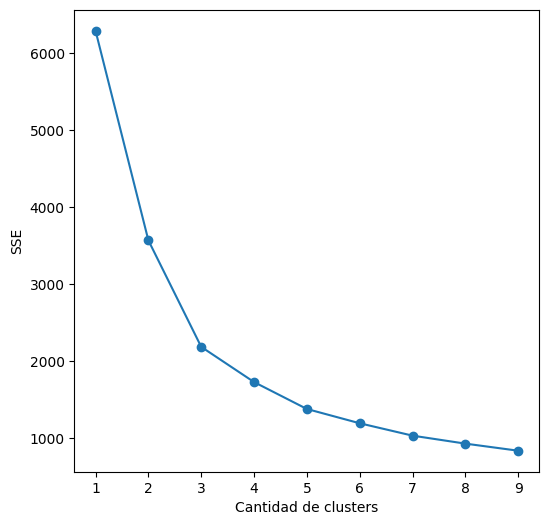

In [9]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(ds_properati_numeric_escalado)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

- Observando el grafico podemos concluir que se formarian de 3 a 4 clusters . 
- Para verificar esto utilizamos el algoritmo de Sillouette

In [74]:
from sklearn.metrics import silhouette_score

list_k = [3, 6]

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(ds_properati_numeric_escalado)

    score = silhouette_score (ds_properati_numeric_escalado, preds)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters =3 silhouette score is 0.438043888051051
For n_clusters =6 silhouette score is 0.34834308718769746


- El score de silhouette da mejor para 3 que para 4 clusters, entonces podemos continuar con 3.

In [12]:
!pip install yellowbrick==1.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 KB 5.1 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


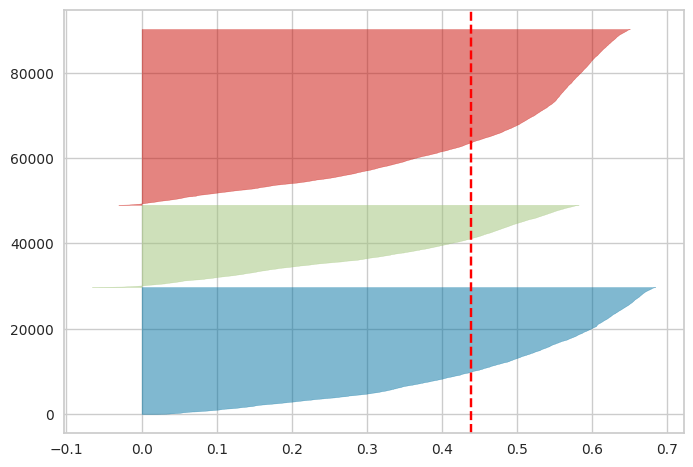

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(3, random_state=0)

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(ds_properati_numeric_escalado)
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3)  #Creamos un objeto de la clase KMeans para realizar el agrupamiento

kmeans.fit(ds_properati_numeric_escalado) #Entrenamos el algoritmo para que aprenda cómo agrupar

y_kmeans = kmeans.predict(ds_properati_numeric_escalado)

- Ahora procedemos a analizar y graficar los grupos formados

In [10]:
def columns_names():
    for i in range(0,7):
        columns_name = ds_properati_numeric.columns[i]
        print(i, columns_name)

In [8]:
# group1 = ds_properati_numeric_escalado[y_kmeans == 0]
# group2 = ds_properati_numeric_escalado[y_kmeans == 1]
# group3 = ds_properati_numeric_escalado[y_kmeans == 2]
group1 = ds_properati_numeric[y_kmeans == 0]
group2 = ds_properati_numeric[y_kmeans == 1]
group3 = ds_properati_numeric[y_kmeans == 2]

In [12]:
columns_names()

0 latitud
1 longitud
2 property_rooms
3 property_bedrooms
4 property_surface_total
5 property_surface_covered
6 property_price


- Primero analizamos las distintas combinaciones de variables 

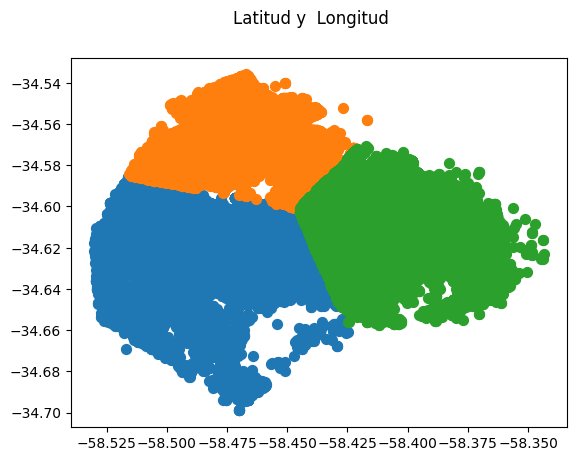

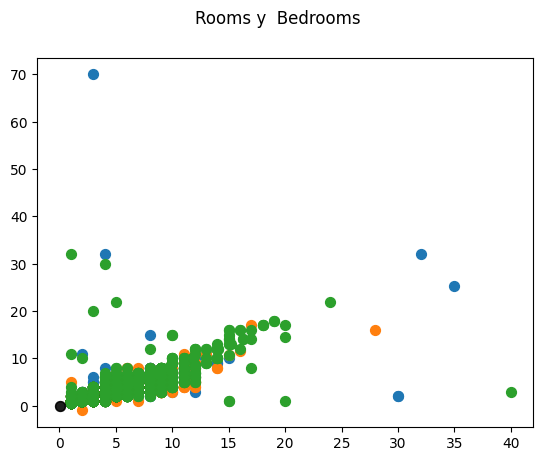

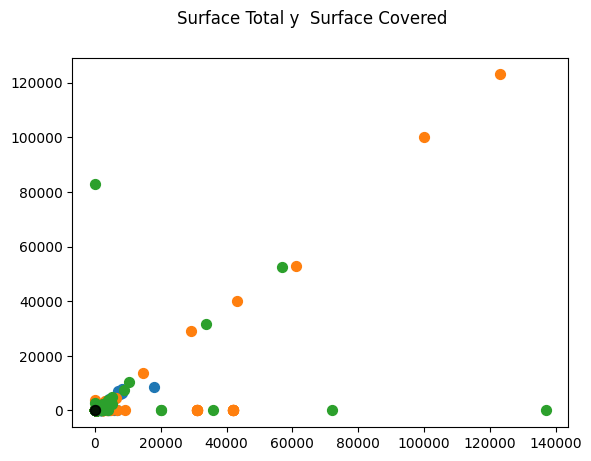

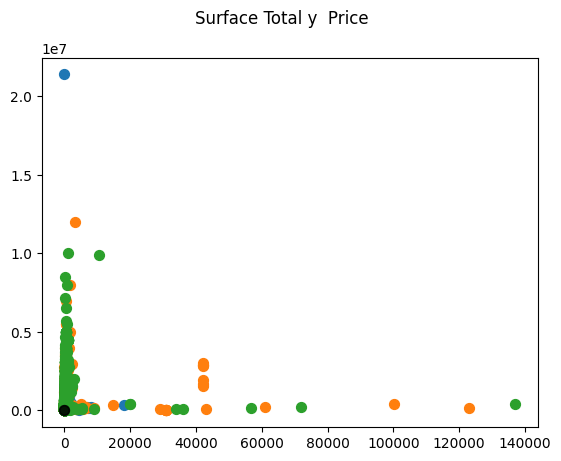

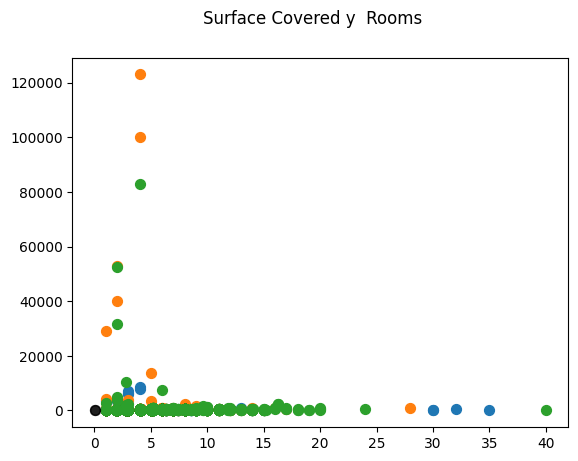

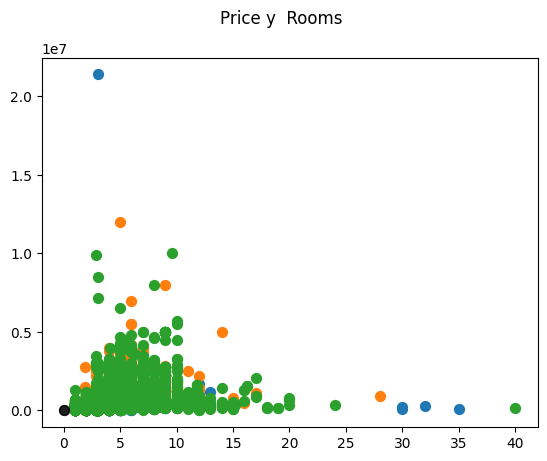

In [11]:
fig, ax = plt.subplots(1)
fig.suptitle('Latitud y  Longitud')
# plt.scatter(group1.iloc[:, 0], group1.iloc[:, 1],s=50 ,cmap='viridis')
# plt.scatter(group2.iloc[:, 0], group2.iloc[:, 1],s=50 ,cmap='viridis')
# plt.scatter(group3.iloc[:, 0], group3.iloc[:, 1],s=50 ,cmap='viridis')
plt.scatter(x=group1.longitud, y=group1.latitud,s=50 ,cmap='viridis')
plt.scatter(x=group2.longitud, y=group2.latitud,s=50 ,cmap='viridis')
plt.scatter(x=group3.longitud, y=group3.latitud,s=50 ,cmap='viridis')

fig, ax = plt.subplots(1)
fig.suptitle('Rooms y  Bedrooms')
plt.scatter(group1.iloc[:, 2], group1.iloc[:, 3],s=50 ,cmap='viridis')
plt.scatter(group2.iloc[:, 2], group2.iloc[:, 3],s=50 ,cmap='viridis')
plt.scatter(group3.iloc[:, 2], group3.iloc[:, 3],s=50 ,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 2], c='black', s=200, alpha=0.5,marker='.')

fig, ax = plt.subplots(1)
fig.suptitle('Surface Total y  Surface Covered')
plt.scatter(group1.iloc[:, 4], group1.iloc[:, 5],s=50 ,cmap='viridis')
plt.scatter(group2.iloc[:, 4], group2.iloc[:, 5],s=50 ,cmap='viridis')
plt.scatter(group3.iloc[:, 4], group3.iloc[:, 5],s=50 ,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 4], centers[:, 4], c='black', s=200, alpha=0.5,marker='.')

fig, ax = plt.subplots(1)
fig.suptitle('Surface Total y  Price')
plt.scatter(group1.iloc[:, 4], group1.iloc[:, 6],s=50 ,cmap='viridis')
plt.scatter(group2.iloc[:, 4], group2.iloc[:, 6],s=50 ,cmap='viridis')
plt.scatter(group3.iloc[:, 4], group3.iloc[:, 6],s=50 ,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 4], centers[:, 4], c='black', s=200, alpha=0.5,marker='.')

fig, ax = plt.subplots(1)
fig.suptitle('Surface Covered y  Rooms')
plt.scatter(group1.iloc[:, 2], group1.iloc[:, 5],s=50 ,cmap='viridis')
plt.scatter(group2.iloc[:, 2], group2.iloc[:, 5],s=50 ,cmap='viridis')
plt.scatter(group3.iloc[:, 2], group3.iloc[:, 5],s=50 ,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 2], c='black', s=200, alpha=0.5,marker='.')

fig, ax = plt.subplots(1)
fig.suptitle('Price y  Rooms')
plt.scatter(group1.iloc[:, 2], group1.iloc[:, 6],s=50 ,cmap='viridis')
plt.scatter(group2.iloc[:, 2], group2.iloc[:, 6],s=50 ,cmap='viridis')
plt.scatter(group3.iloc[:, 2], group3.iloc[:, 6],s=50 ,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 2], c='black', s=200, alpha=0.5,marker='.')
fig.show()


# a sacar conclusiones 
### [Ramiro] - Haciendo zoom a los graficos, salvo en el primero, no se ven clusters, los puntos se cruzan entre grupos sin mostrar ningun tipo de patron.
- Podemos ver en el grafico de Latitud y longitud que los clusters se forman por cercania/ zonas. Sabiendo que cada todas las propiedades se encuentran en capital federal podemos decir que se agrypan en 3 zonas principalmente.
- Podemos ver en el grafico de Rooms y Bedrooms ...
- Podemos ver en el grafico de Surface Total y Surface covered ...
- Podemos ver en el grafico de Surface Total y Price ...
- Podemos ver en el grafico de Rooms y Surface covered ...
- Podemos ver en el grafico de Rooms y Price  ...



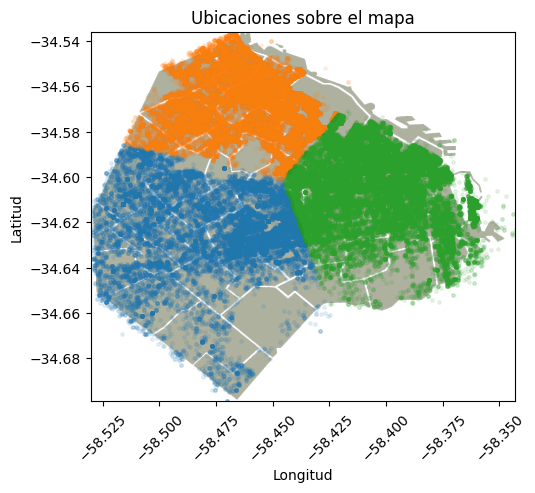

In [15]:
# calculamos limites de la imagen
lat_min = ds_properati_numeric['latitud'].min()
lat_max = ds_properati_numeric['latitud'].max()
long_min = ds_properati_numeric['longitud'].min()
long_max = ds_properati_numeric['longitud'].max()

# seteamos limites del grafico
plt.xlim([long_min, long_max])
plt.ylim([lat_min,lat_max])

# cargamos imagen y ajustamos su tamaño
im = plt.imread("mapa.png")
plt.imshow(im, extent=[long_min-0.0075, long_max+0.0025, lat_min, lat_max])

# graficamos los puntos
plt.scatter(x=group1.longitud,y=group1.latitud ,s=25 ,cmap='viridis', alpha=0.1, marker='.')
plt.scatter(x=group2.longitud,y=group2.latitud ,s=25 ,cmap='viridis', alpha=0.1, marker='.')
plt.scatter(x=group3.longitud,y=group3.latitud ,s=25 ,cmap='viridis', alpha=0.1, marker='.')

plt.title('Ubicaciones sobre el mapa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tick_params(axis='x', labelrotation = 45)
plt.show()

# Hice todo esto y pregunta existencial en el ultimo punto de agrypamiento dice "Repetir el análisis anterior, utilizando sólo 3 grupos." por ende la primera vez deberiamos hacer con otro K . Podria ser K=4? Pero esto indica para 3

## 3. Clasificación

### a) Construcción del target

### b) Entrenamiento y Predicción

### Modelo 1 : Árbol de decisión

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7da1cea6-caf2-4c30-b019-068f1fb82c77' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>